Q1)Using BFS and heuristic to search for goal state from start state

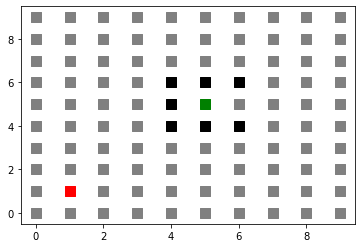

In [9]:
#Q1)BFS
# Breadth first search:
import numpy as np
import matplotlib.pyplot as plt
import copy
n=10
class node:
    def __init__(self,colour="gray",x=0,y=0,parent=None,action="nil",f=0,g=0,h=0):
        self.colour=colour
        self.x=0
        self.y=0
        self.parent = parent
        self.action=action
        self.f=f
        self.g=g
        self.h=h

grid=[[node() for i in range(n)] for j in range(n)]
for i in range(n):
    for j in range(n):
        grid[i][j].x=i
        grid[i][j].y=j
no_of_goals=1
grid[1][1].colour="red"
Start=grid[1][1]
grid[5][5].colour="green"
Goal=grid[5][5]
grid[4][4].colour="black"
grid[4][5].colour="black"
grid[4][6].colour="black"
grid[5][4].colour="black"
grid[5][6].colour="black"
grid[6][4].colour="black"
grid[6][6].colour="black"
grid2=copy.deepcopy(grid)
for i in range(n):
    for j in range(n):
        plt.scatter(i,j,color=grid[i][j].colour,s=100,marker='s')
plt.ylim(-.5,(n-0.5))
# plt.gca().invert_yaxis()
plt.show()
#initial condition of the grid

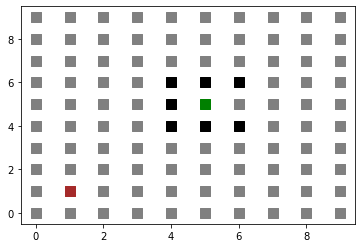

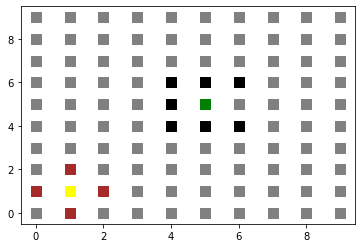

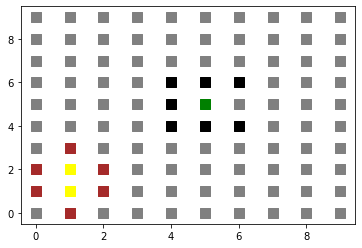

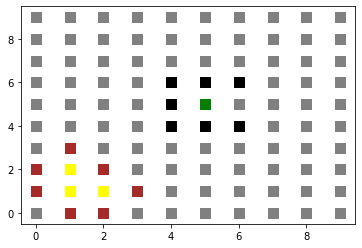

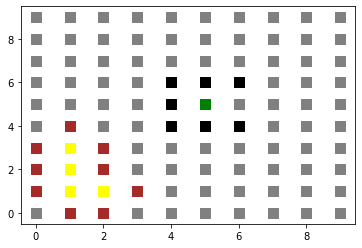

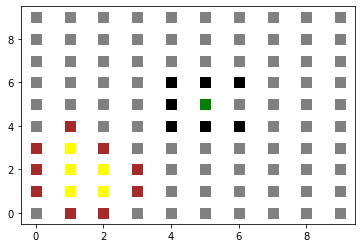

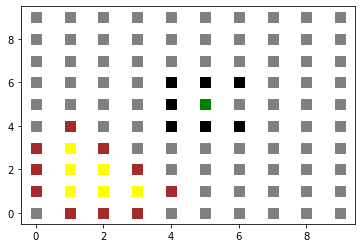

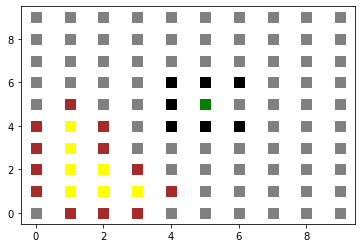

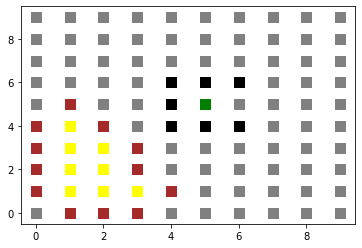

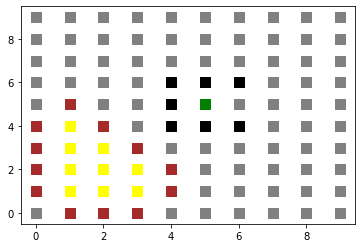

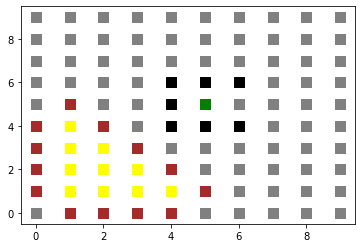

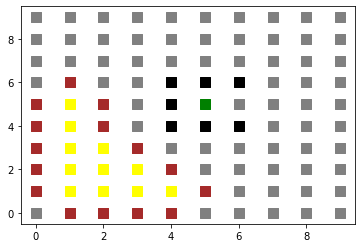

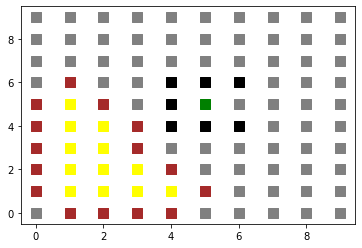

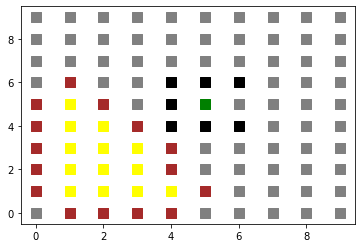

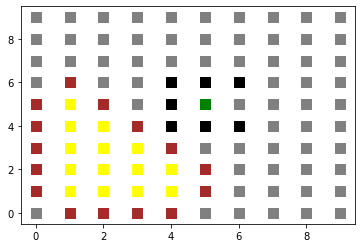

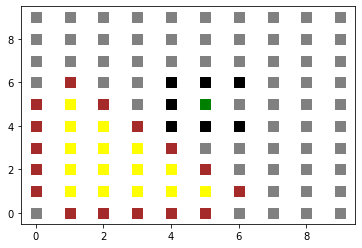

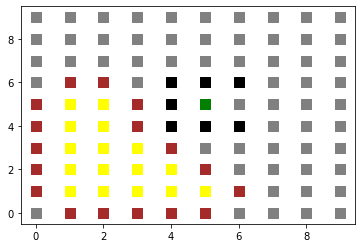

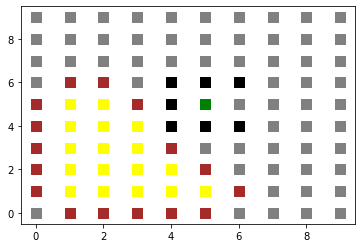

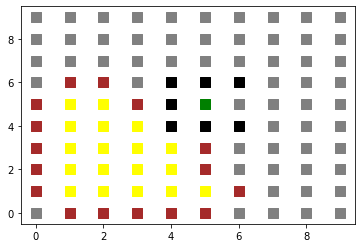

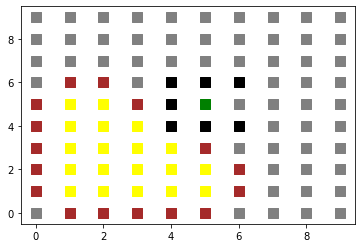

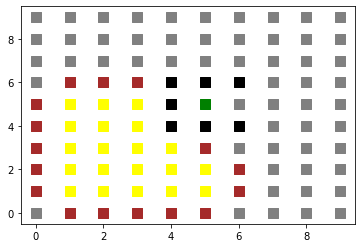

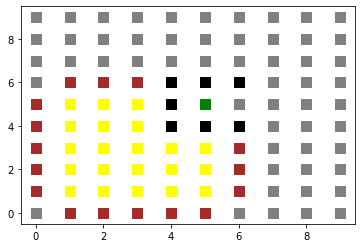

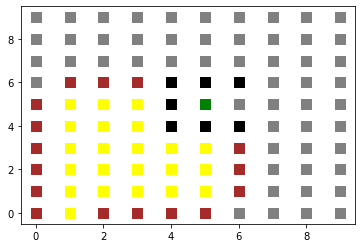

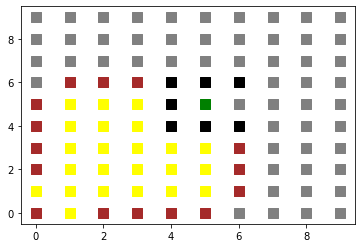

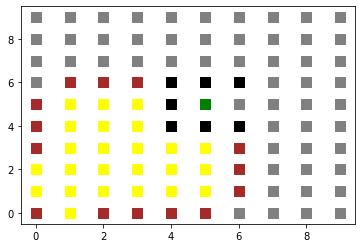

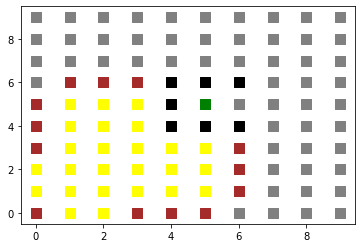

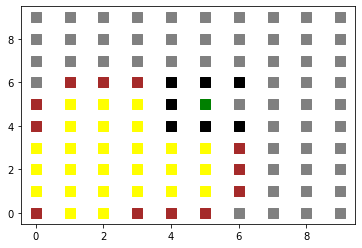

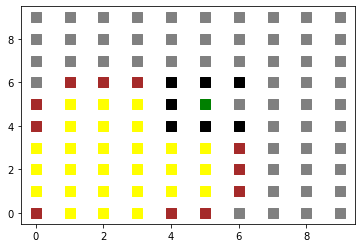

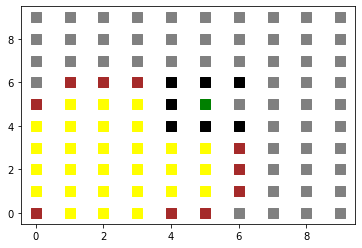

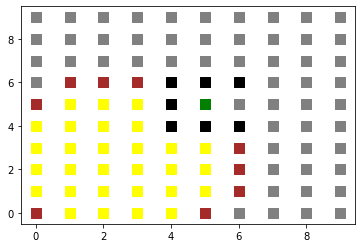

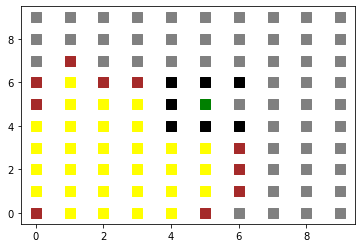

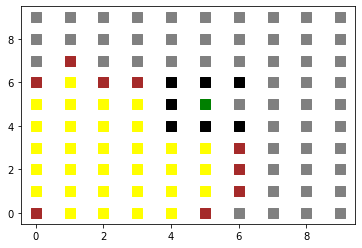

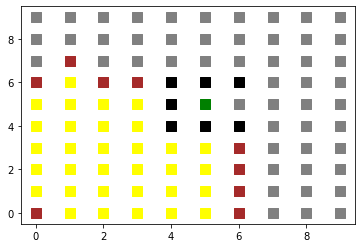

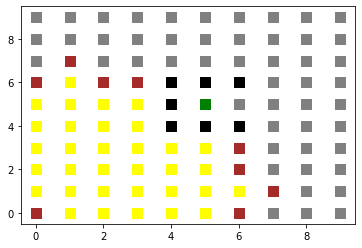

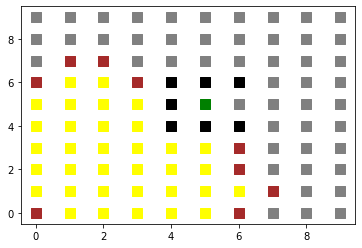

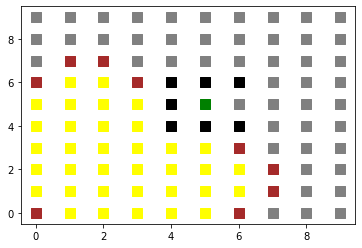

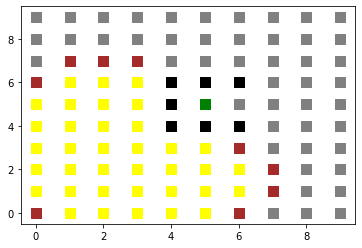

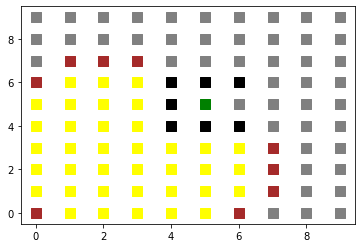

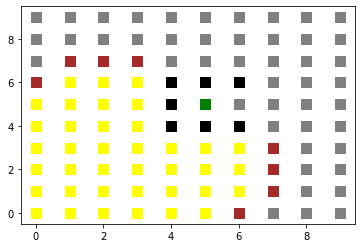

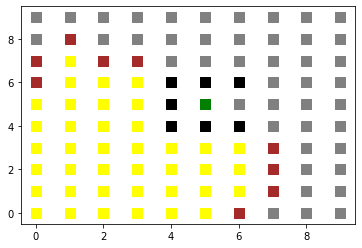

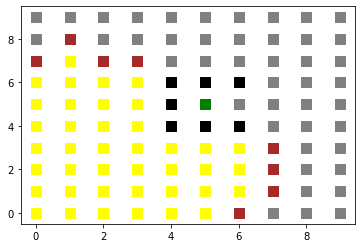

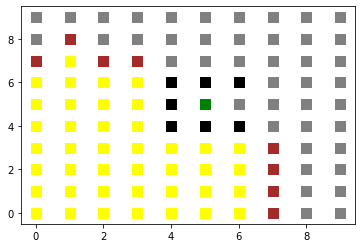

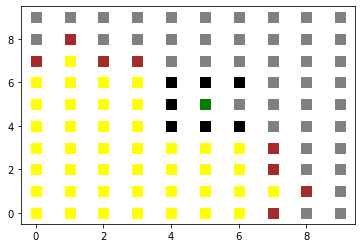

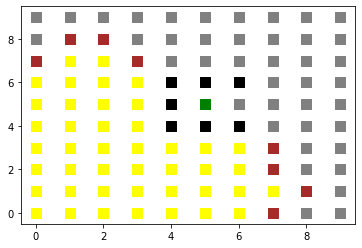

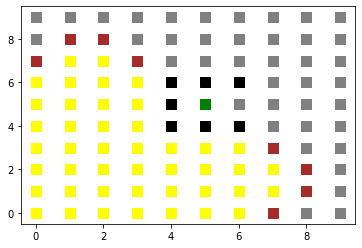

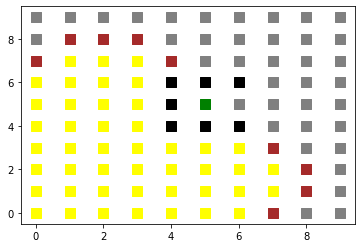

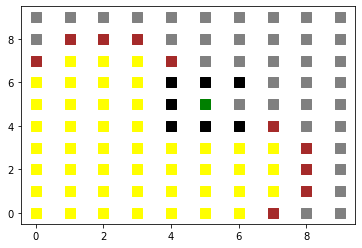

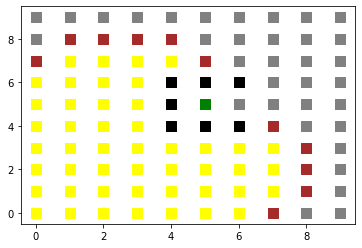

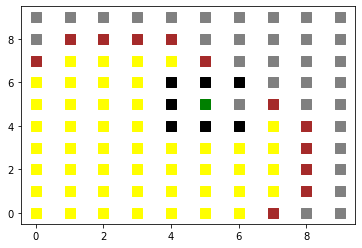

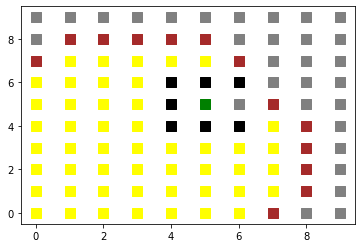

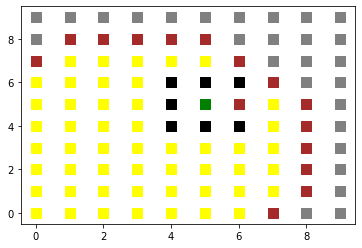

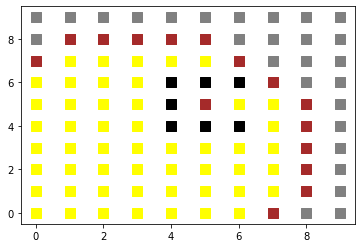

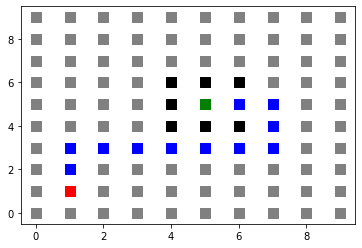

In [8]:
import copy
q = []  # Initialize a queue


def Manhattan_dist(curr_node, Goal):
    return abs(curr_node.x-Goal.x)+abs(curr_node.y-Goal.y)

def dist(e):
    return e.f

def up(child,parent):
    child.colour="yellow"
    child.action="up"
    child.g=parent.g+1
    child.h=Manhattan_dist(child,Goal)
    child.f=child.g+child.h
    return child
def down(child,parent):
    child.colour="yellow"
    child.action="down"
    child.g=parent.g+1
    child.h=Manhattan_dist(child,Goal)
    child.f=child.g+child.h
    return child
def right(child,parent):
    child.colour="yellow"
    child.action="right"
    child.g=parent.g+1
    child.h=Manhattan_dist(child,Goal)
    child.f=child.g+child.h
    return child
def left(child,parent):
    child.colour="yellow"
    child.action="left"
    child.g=parent.g+1
    child.h=Manhattan_dist(child,Goal)
    child.f=child.g+child.h
    return child
#Yellow is visited
#Brown is for frontier
def A_star(g, node):
    node.colour = "yellow"
    node.action = "start"
    node.g = 0
    node.h = Manhattan_dist(node, Goal)
    node.f = node.g+node.f
    q.append(node)
    while len(q) != 0:
        for i in range(n):
            for j in range(n):
                plt.scatter(i, j, color=g[i][j].colour, s=100, marker='s')
        for ele in q:
            plt.scatter(ele.x,ele.y,color="brown",s=100,marker='s')
        plt.ylim(-.5, (n-0.5))
        # plt.gca().invert_yaxis()
        plt.show()
        front = q.pop(0)
        # If goal is reached than return goal
        if Manhattan_dist(front, Goal) == 0:
            return front
        if front.y != 0:
            if (g[front.x][front.y-1].colour == "gray" or g[front.x][front.y-1].colour == "green"):  # for up action state
                N=up(g[front.x][front.y-1],front)
                N.parent = front
                q.append(N)

        if front.y != (n-1):
            if (g[front.x][front.y+1].colour == "gray" or g[front.x][front.y+1].colour == "green"):  # for down action
                N=down(g[front.x][front.y+1],front)
                N.parent = front
                q.append(N)

        if front.x != 0:
            if (g[front.x-1][front.y].colour == "gray" or g[front.x-1][front.y].colour == "green"):  # for left action
                N=left(g[front.x-1][front.y],front)
                N.parent = front
                q.append(N)

        if front.x != (n-1):
            if (g[front.x+1][front.y].colour == "gray" or g[front.x+1][front.y].colour == "green"):  # for right action
                N=up(g[front.x+1][front.y],front)
                N.parent = front
                q.append(N)
        q.sort(key=dist)
    return front


goal_reached = A_star(grid, Start)
for i in range(n):
    for j in range(n):
        plt.scatter(i, j, color=grid2[i][j].colour, s=100, marker='s')
N=goal_reached.parent
while N.parent!=None:
    plt.scatter(N.x,N.y,color="blue",s=100,marker='s')
    N=N.parent
plt.ylim(-.5, (n-0.5))
# plt.gca().invert_yaxis()
plt.show()

In [10]:
# Using A* search for puzzle 
import numpy as np
import copy
n=3
class node():
    def __init__(self,state=np.zeros(n*n),parent=None,action="start",fn=1000000):
        self.state =state
        self.parent = parent
        self.action=action
        self.fn=fn

#Frontier is an queue
Frontier=[]     
#Explored is an set of states which has been explored
Explored={}

def A_star(N,pos1,pos2):
    state=copy.deepcopy(N.state)
    d1=abs(((pos1-1)//n)-2)+abs(((pos1-1)%n)-1)+abs(((pos2-1)//n)-2)+abs(((pos2-1)%n)-2)
    d2=abs(((pos2-1)//n)-2)+abs(((pos2-1)%n)-1)+abs(((pos1-1)//n)-2)+abs(((pos1-1)%n)-2)
    fn=min(d1,d2)
    fn=0
    z=0
    for i in range(n):
        for j in range(n):
            if state[z]!='s':
                fn+=(abs(((int(state[z])-1)//n)-i)+abs(((int(state[z])-1)%n)-j))
            z+=1
    return fn
#Initial node as defined in Question:
Start=node()
Start.state=['2','6','s','4','3','7','5','s','1']
Explored["1234567ss"]="goal"

def list_to_string(l):
    str=""
    for element in l:
        str+=element
    return str
#Defining all the action state below:
#For the up movement of the empty space
def up(parent,pos):
    action=True
    N=node()
    N.state=copy.deepcopy(parent.state)
    if pos<n:
        N.action="None"
        action=False
    else:
        N.action="up"
        #swap the space with upper element in list
        N.state[pos],N.state[pos-n]=N.state[pos-n],N.state[pos]
    return N,action

#for the down movement of the emoty space
def down(parent,pos):
    action=True
    N=node()
    N.state=copy.deepcopy(parent.state)
    if pos>=((n*n)-n):
        N.action="None"
        action = False
    else:
        N.action="down"
        #swap the space with below element in list
        N.state[pos],N.state[pos+n]=N.state[pos+n],N.state[pos]
    return N,action

#for the right movement of the empty space
def right(parent,pos):
    action=True
    N=node()
    N.state=copy.deepcopy(parent.state)
    if (pos+1)%n==0:
        N.action="None"
        action=False
    else:
        N.action="right"
        #swap the space with right element in list
        N.state[pos],N.state[pos+1]=N.state[pos+1],N.state[pos]
    return N,action
#For the left movement of the empty space
def left(parent,pos):
    action= True
    N=node()
    N.state=copy.deepcopy(parent.state)
    if (pos+1)%n==1:
        N.action="None"
        action=False
    else:
        N.action="left"
        #swap the space with left element in list
        N.state[pos],N.state[pos-1]=N.state[pos-1],N.state[pos]
    return N,action

#Using graph based BFS to reach goal state:
def BFS(start):
    Frontier.append(start)
    No_of_steps=0
    while Frontier:
        children=[]
        No_of_steps+=1
        front=Frontier.pop(0)
        pos1,pos2,flag=0,0,0
        #For getting the positions of 's'
        for i in range(len(front.state)):
            if flag==0 and front.state[i]=='s':
                pos1=i
                flag+=1
            if flag==1 and front.state[i]=='s':
                pos2=i
        #Slide up first s
        N,swap=up(front,pos1)
        N.parent=front
        string=list_to_string(N.state)
        N.fn=(A_star(N,pos1,pos2))
        
        if swap and Explored.get(string,None)==None:
            Explored[string]="1"
            children.append(N)
        elif swap and Explored[string]=="goal":
            return N,No_of_steps   
        #Slide down first s
        N,swap=down(front,pos1)
        N.parent=front
        string=list_to_string(N.state)
        N.fn=(A_star(N,pos1,pos2))
        
        if swap and Explored.get(string,None)==None:
            Explored[string]="1"
            children.append(N)
        elif swap and Explored[string]=="goal":
            return N,No_of_steps  
        #Slide right first s
        N,swap=right(front,pos1)
        N.parent=front
        string=list_to_string(N.state)
        N.fn=(A_star(N,pos1,pos2))
        
        if swap and Explored.get(string,None)==None:
            Explored[string]="1"
            children.append(N) 
        elif swap and Explored[string]=="goal":
            return N,No_of_steps 
        #Slide left first s
        N,swap=left(front,pos1)
        N.parent=front
        string=list_to_string(N.state)
        N.fn=(A_star(N,pos1,pos2))
        
        if swap and Explored.get(string,None)==None:
            Explored[string]="1"
            children.append(N)
        elif swap and Explored[string]=="goal":
            return N,No_of_steps 
        #Slide up second s
        N,swap=up(front,pos2)
        N.parent=front
        string=list_to_string(N.state)
        N.fn=(A_star(N,pos1,pos2))
        
        if swap and Explored.get(string,None)==None:
            Explored[string]="1"
            children.append(N)
        elif swap and Explored[string]=="goal":
            return N,No_of_steps  
        #Slide down second s
        N,swap=down(front,pos2)
        N.parent=front
        string=list_to_string(N.state)
        N.fn=(A_star(N,pos1,pos2))
        
        if swap and Explored.get(string,None)==None:
            Explored[string]="1"
            children.append(N)
        elif swap and Explored[string]=="goal":
            return N,No_of_steps 
        #Slide right second s
        N,swap=right(front,pos2)
        N.parent=front
        string=list_to_string(N.state)
        N.fn=(A_star(N,pos1,pos2))
        
        if swap and Explored.get(string,None)==None:
            Explored[string]="1"
            children.append(N)
        elif swap and Explored[string]=="goal":
            return N,No_of_steps  
        #Slide left second s
        N,swap=left(front,pos2)
        N.parent=front
        string=list_to_string(N.state)
        N.fn=(A_star(N,pos1,pos2))
        
        if swap and Explored.get(string,None)==None:
            Explored[string]="1"
            children.append(N)
        elif swap and Explored[string]=="goal":
            return N,No_of_steps 
        min=10000000 
        index=0
        for i in range(len(children)):
            # print(children[i].fn,end=" ")
            if min>children[i].fn:
                index=i
                min=children[i].fn
        if len(children):
            N=children.pop(index)
            Frontier.append(N)
        k=len(children)-1
        if k<0:
            k+=1
        while k:
            if(children[k].fn==min):
                N=children.pop(k)
                # print(N.fn)
                Frontier.append(N)
            k-=1

goal,No_of_steps=BFS(Start)

In [11]:
from queue import LifoQueue
stack=LifoQueue()        #Initialize a stackueue
itr=0
N=goal
while N.parent!=None:
    stack.put(N)
    N=N.parent
print("No of steps to reach the goal is",stack.qsize())
print("The initial configuration given in question:",end="")
for i in range(n*n):
    if (i)%n==0:
        print("")
    print(N.state[i],end=" ")
while stack.qsize():
    N=stack.get()
    print("\nAction:",N.action)
    print("The current configuration:",end="")
    for i in range(n*n):
        if (i)%n==0:
            print("")
        print(N.state[i],end=" ")

No of steps to reach the goal is 16
The initial configuration given in question:
2 6 s 
4 3 7 
5 s 1 
Action: right
The current configuration:
2 6 s 
4 3 7 
5 1 s 
Action: up
The current configuration:
2 6 s 
4 3 s 
5 1 7 
Action: left
The current configuration:
2 6 s 
4 s 3 
5 1 7 
Action: down
The current configuration:
2 6 s 
4 1 3 
5 s 7 
Action: left
The current configuration:
2 6 s 
4 1 3 
s 5 7 
Action: down
The current configuration:
2 6 3 
4 1 s 
s 5 7 
Action: up
The current configuration:
2 6 3 
s 1 s 
4 5 7 
Action: right
The current configuration:
2 6 3 
1 s s 
4 5 7 
Action: up
The current configuration:
2 s 3 
1 6 s 
4 5 7 
Action: left
The current configuration:
s 2 3 
1 6 s 
4 5 7 
Action: down
The current configuration:
1 2 3 
s 6 s 
4 5 7 
Action: down
The current configuration:
1 2 3 
4 6 s 
s 5 7 
Action: left
The current configuration:
1 2 3 
4 s 6 
s 5 7 
Action: down
The current configuration:
1 2 3 
4 5 6 
s s 7 
Action: right
The current configuration:
1 2 3 
